<a href="https://colab.research.google.com/github/hargurjeet/DeepLearning/blob/main/GTRSB%20-%20CNN%20(TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# German Traffic Signal Dataset

# 1: Introduction

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. Following are the details of the dataset

<br> 1. Single-image, multi-class classification problem
<br> 2. More than 40 classes
<br> 3. More than 50,000 images in total
<br> 4. Large, lifelike database

# 2: Data Pre processing

## 2.1 Loading the required Libraries

In [4]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import shutil

2.4.1


In [5]:
! pip install opendatasets --upgrade

In [6]:
from google.colab import files
files.upload()

import opendatasets as od

dataset_url = 'https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'
od.download(dataset_url)

Saving kaggle.json to kaggle.json


  1%|          | 5.00M/612M [00:00<00:13, 47.4MB/s]

100%|██████████| 612M/612M [00:06<00:00, 105MB/s]


## 2.2 Get Data

In [7]:
meta_df = pd.read_csv('/content/gtsrb-german-traffic-sign/Meta.csv')
test_data = pd.read_csv('/content/gtsrb-german-traffic-sign/Test.csv')
train_data = pd.read_csv('/content/gtsrb-german-traffic-sign/Train.csv')

In [8]:
meta_df.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [9]:
test_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [10]:
train_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


# 3: Exploring GTRSB dataset

## Q: How many images does the training and testing dataset contain?

In [49]:
print('Length of training data', len(train_data))
print('Length of testing data',len(test_data))
print(f'Total Images = {len(train_data)} + {len(test_data)} = {len(train_data) + len(test_data)}')

Length of training data 39209
Length of testing data 12630
Total Images = 39209 + 12630 = 51839


Q: How many output classes does the dataset contain?

In [12]:
len(train_data.ClassId.value_counts())

43

## Q: What is the shape of an image from the dataset?

In [15]:
## Reading the image size

import cv2

im1 = cv2.imread('/content/gtsrb-german-traffic-sign/Train/0/00000_00000_00000.png')

im2 = cv2.imread('/content/gtsrb-german-traffic-sign/Train/0/00000_00000_00005.png')

# print(type(im))
# <class 'numpy.ndarray'>

print('Size of image:', im1.shape)
print('Size of image:', im2.shape)
# print(type(im.shape))

Size of image: (30, 29, 3)
Size of image: (31, 31, 3)


It is evident that all the images within the dataset are of different size.

## Q: Let us print a sample image along with along with its class ?

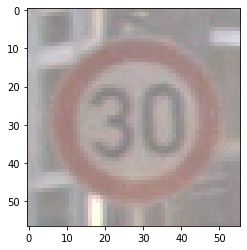

In [23]:
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('/content/gtsrb-german-traffic-sign/Train/1/00001_00000_00000.png')
  
# Output Images
plt.imshow(img);


## Q: Determine the number of images belonging to each class in training set?

In [48]:
df = train_data.ClassId.value_counts()
df.sort_index().head()

0     210
1    2220
2    2250
3    1410
4    1980
Name: ClassId, dtype: int64

Text(0, 0.5, 'Images under each Class')

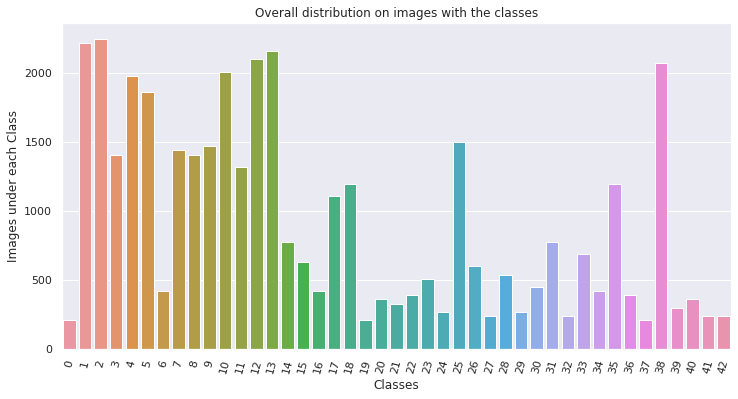

In [45]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.xlabel('Classes')

plt.title('Overall distribution on images with the classes')
sns.barplot(x=df.index, y=df);
plt.ylabel('Images under each Class')

It is observed that few classes seems to have high no of images(like class 2,3..etc.) where as few classes are having very low no of images (like 19, 24...etc)

# 4: Preparing the data for training

## 4.1 Setting up the ImageDataGenerators for testing and training set.

In TensorFlow, data augmentation is accomplished using the ImageDataGenerator class. It is exceedingly simple to understand and to use. The entire dataset is looped over in each epoch, and the images in the dataset are transformed as per the options and values selected.

In [ ]:
## Setting up the Augmentation 

train_dir = '/content/gtsrb-german-traffic-sign/Train'

train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:

train_generator = train_datagen.flow_from_directory(
     train_dir,  # This is the source directory for training images
     subset='training',
     target_size=(30, 30),  # All images will be resized to 150x150
     batch_size=32,
     color_mode='rgb',    
     shuffle=True,
     seed=42,
        # Since we use binary_crossentropy loss, we need binary labels
     class_mode='categorical')
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = train_datagen.flow_from_directory(
        train_dir,
        subset='validation',
        target_size=(30, 30),
        batch_size=32,
        color_mode='rgb',    
        shuffle=True,
        seed=42,
        class_mode='categorical')

# 3. Building the CNN Model and Running the validaitons

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(30,30,3)),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(8, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(43, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=validation_generator.n//validation_generator.batch_size)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

An accuracy of 82 percent is acheived. It is also observed from the above values of validation accuracy that the results are not over fitting.

In [ ]:
df1.head()

## 3.1 Reading the test data

In [ ]:
from shutil import copyfile


src_dir  = "/content/gtsrb-german-traffic-sign/"
test_dir = "/content/gtsrb-german-traffic-sign/Test_1/"

os.makedirs(test_dir)
for i in range(len(df1)):
    if not os.path.exists(test_dir+str(df1.iloc[i].ClassId)):
      os.makedirs(test_dir+str(df1.iloc[i].ClassId))
    copyfile(src_dir+df1.iloc[i].Path, test_dir+str(df1.iloc[i].ClassId)+'/'+df1.iloc[i].Path[5:])

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(30,30),
    batch_size=32,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='categorical')

In [ ]:
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size

score = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
jovian.commit()